# **Problem Statement**

buiding a predictive model to find out the sales patterns of each product at a particular store.

# **Hypothesis Generation**

I assume that sales patterns depend on stores location, Item_fat_content, Outlet_Establishment_year, stores sizes, and product types. for instance, if the store is located near GYM or sports-wear and accessories shop, definitely the sales of low fat and healthy products will be higher. another example, if the store is close to a hospital, then there's a high probability that the sale of vegetables, fruits, all healthy fresh non-processed food ,health and hygeniec product.

# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

# **Loading Data**

In [2]:
trdf = pd.read_csv("Train.csv")
trdf

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# **Data Structure and Content**

In [3]:
trdf.shape

(8523, 12)

In [4]:
trdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
trdf.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
tsdf = pd.read_csv("Test.csv")
tsdf

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [7]:
trdf.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
tsdf.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [9]:
trdf.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [10]:
tsdf.Outlet_Size.value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [11]:
trdf['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [12]:
trdf['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [13]:
trdf['Outlet_Size'] = trdf['Outlet_Size'].replace(np.nan, trdf['Outlet_Size'].mode().values[0])

In [14]:
tsdf['Outlet_Size'] = tsdf['Outlet_Size'].replace(np.nan, tsdf['Outlet_Size'].mode().values[0])

In [15]:
trdf['Outlet_Size'].isnull().sum()

0

In [16]:
tsdf['Outlet_Size'].isnull().sum()

0

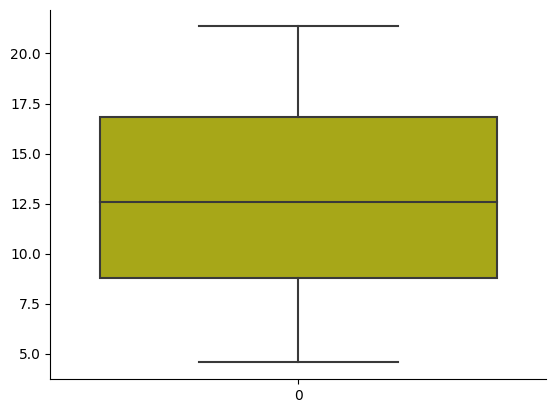

In [17]:
sns.boxplot(trdf['Item_Weight'], color= 'y')
sns.despine()

In [18]:
trdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [19]:
trdf['Item_Weight'] = trdf['Item_Weight'].replace(np.nan, trdf['Item_Weight'].mean())

In [20]:
trdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [21]:
tsdf['Item_Weight'] = tsdf['Item_Weight'].replace(np.nan, tsdf['Item_Weight'].mean())

In [22]:
trdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [23]:
tsdf['Item_Weight'].isnull().value_counts()

False    5681
Name: Item_Weight, dtype: int64

In [24]:
trdf.tail(40)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8483,DRI11,8.260000,Low Fat,0.034474,Hard Drinks,117.0834,OUT045,2002,Medium,Tier 2,Supermarket Type1,1612.5676
8484,DRJ49,6.865000,Low Fat,0.000000,Soft Drinks,129.9652,OUT013,1987,High,Tier 3,Supermarket Type1,2324.9736
8485,DRK37,12.857645,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8486,FDR20,20.000000,Regular,0.000000,Fruits and Vegetables,46.4744,OUT010,1998,Medium,Tier 3,Grocery Store,45.2744
8487,DRG13,12.857645,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,12.857645,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8489,FDV13,17.350000,Regular,0.027723,Canned,89.6856,OUT018,2009,Medium,Tier 3,Supermarket Type2,2109.2544
8490,FDU44,12.857645,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656
8491,FDO03,10.395000,Regular,0.037033,Meat,227.9352,OUT018,2009,Medium,Tier 3,Supermarket Type2,4809.7392
8492,FDT34,9.300000,Low Fat,0.174350,Snack Foods,104.4964,OUT046,1997,Small,Tier 1,Supermarket Type1,2419.5172


notice: reg --> regular. we need to handle this

first step before visualisation and do further analysis we have to split numerical from categorical data.

In [25]:
numtr = trdf.select_dtypes(include=['int64', 'float64'])

In [26]:
cattr = trdf.select_dtypes(include=['object'])

In [27]:
print(numtr.value_counts())

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  Item_Outlet_Sales
4.555        0.034329         110.1544  1987                       1230.3984            1
14.350       0.028519         109.2228  1998                       221.0456             1
14.500       0.000000         169.6448  2004                       2045.3376            1
                              159.3262  2004                       2864.2716            1
                              154.4682  1987                       1524.6820            1
                                                                                       ..
11.100       0.059797         151.8366  1987                       1057.9562            1
             0.054080         165.9526  2007                       2631.2416            1
             0.053765         163.1526  2004                       1808.9786            1
             0.053731         165.1526  1987                       1480.0734            1
21.350       0.

In [28]:
print(cattr.value_counts())

Item_Identifier  Item_Fat_Content  Item_Type              Outlet_Identifier  Outlet_Size  Outlet_Location_Type  Outlet_Type      
DRA12            LF                Soft Drinks            OUT035             Small        Tier 2                Supermarket Type1    1
FDV28            Regular           Frozen Foods           OUT010             Medium       Tier 3                Grocery Store        1
FDV32            Low Fat           Fruits and Vegetables  OUT035             Small        Tier 2                Supermarket Type1    1
                                                          OUT019             Small        Tier 1                Grocery Store        1
                                                          OUT018             Medium       Tier 3                Supermarket Type2    1
                                                                                                                                    ..
FDJ22            Low Fat           Snack Foods            OU

Notice: LF = Low Fat and reg = Regular. so,we need to handle it.

In [29]:
trdf['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], ['Low Fat', 'Low Fat', 'Regular'], inplace = True)

In [30]:
tsdf['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], ['Low Fat', 'Low Fat', 'Regular'], inplace = True)

In [31]:
trdf['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [32]:
tsdf['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

# **Univariate Analysis**

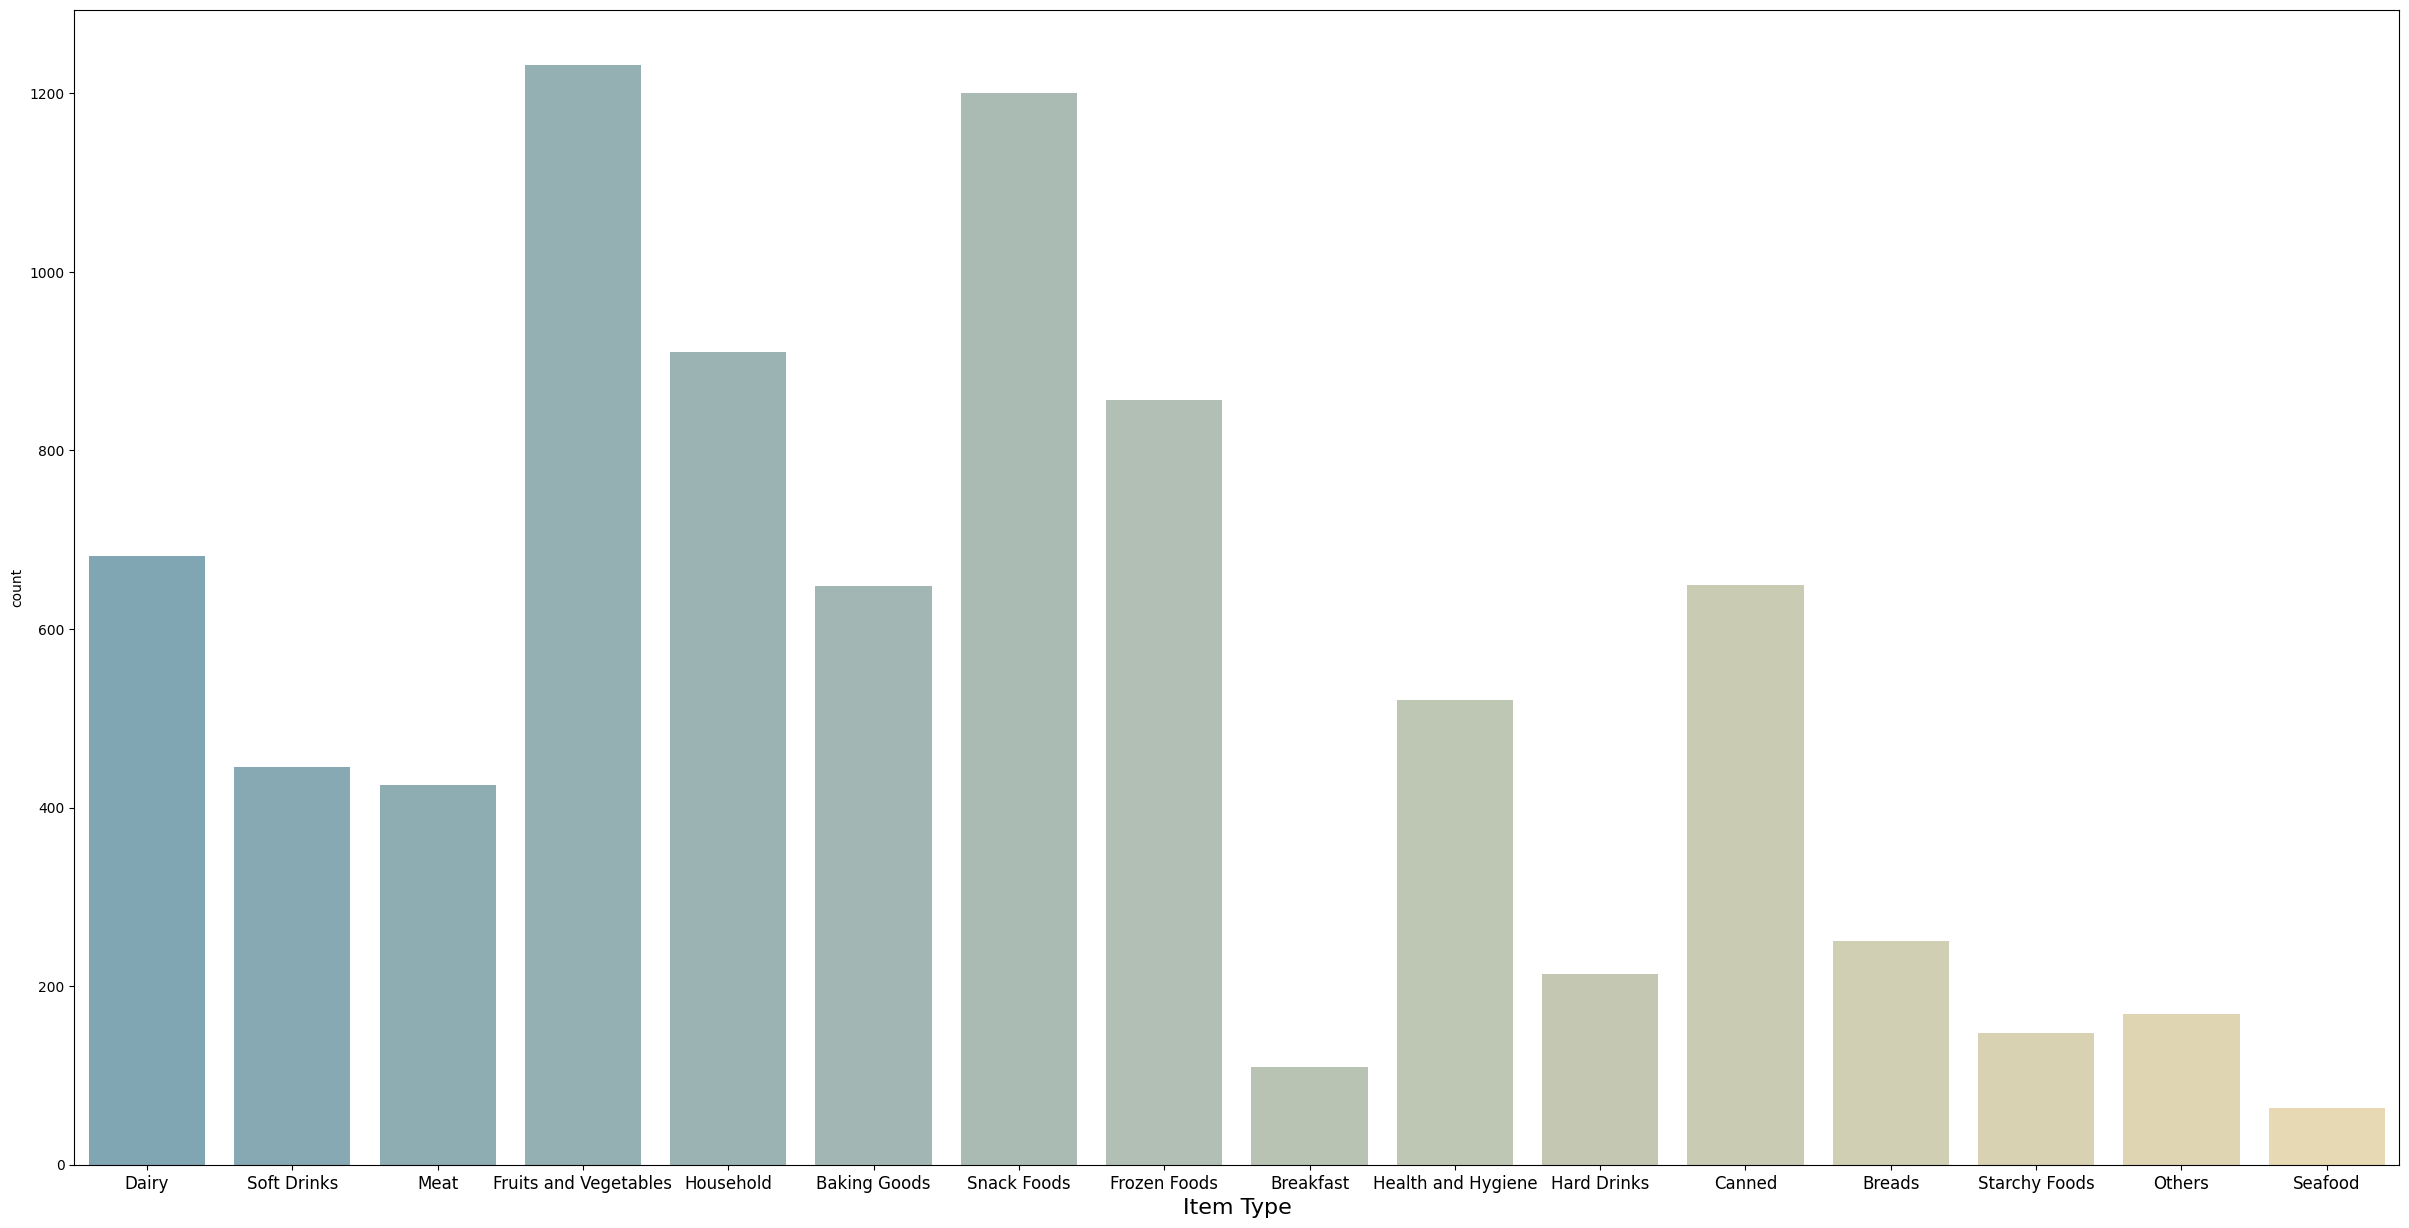

In [33]:
plt.figure(figsize=(30, 15))
sns.countplot(x= 'Item_Type', data= trdf, palette= "blend:#7AB,#EDA")
#sns.color_palette("Spectral", as_cmap=True)
plt.xticks(fontsize= 12)
plt.xlabel('Item Type', fontsize= 16)
plt.show()

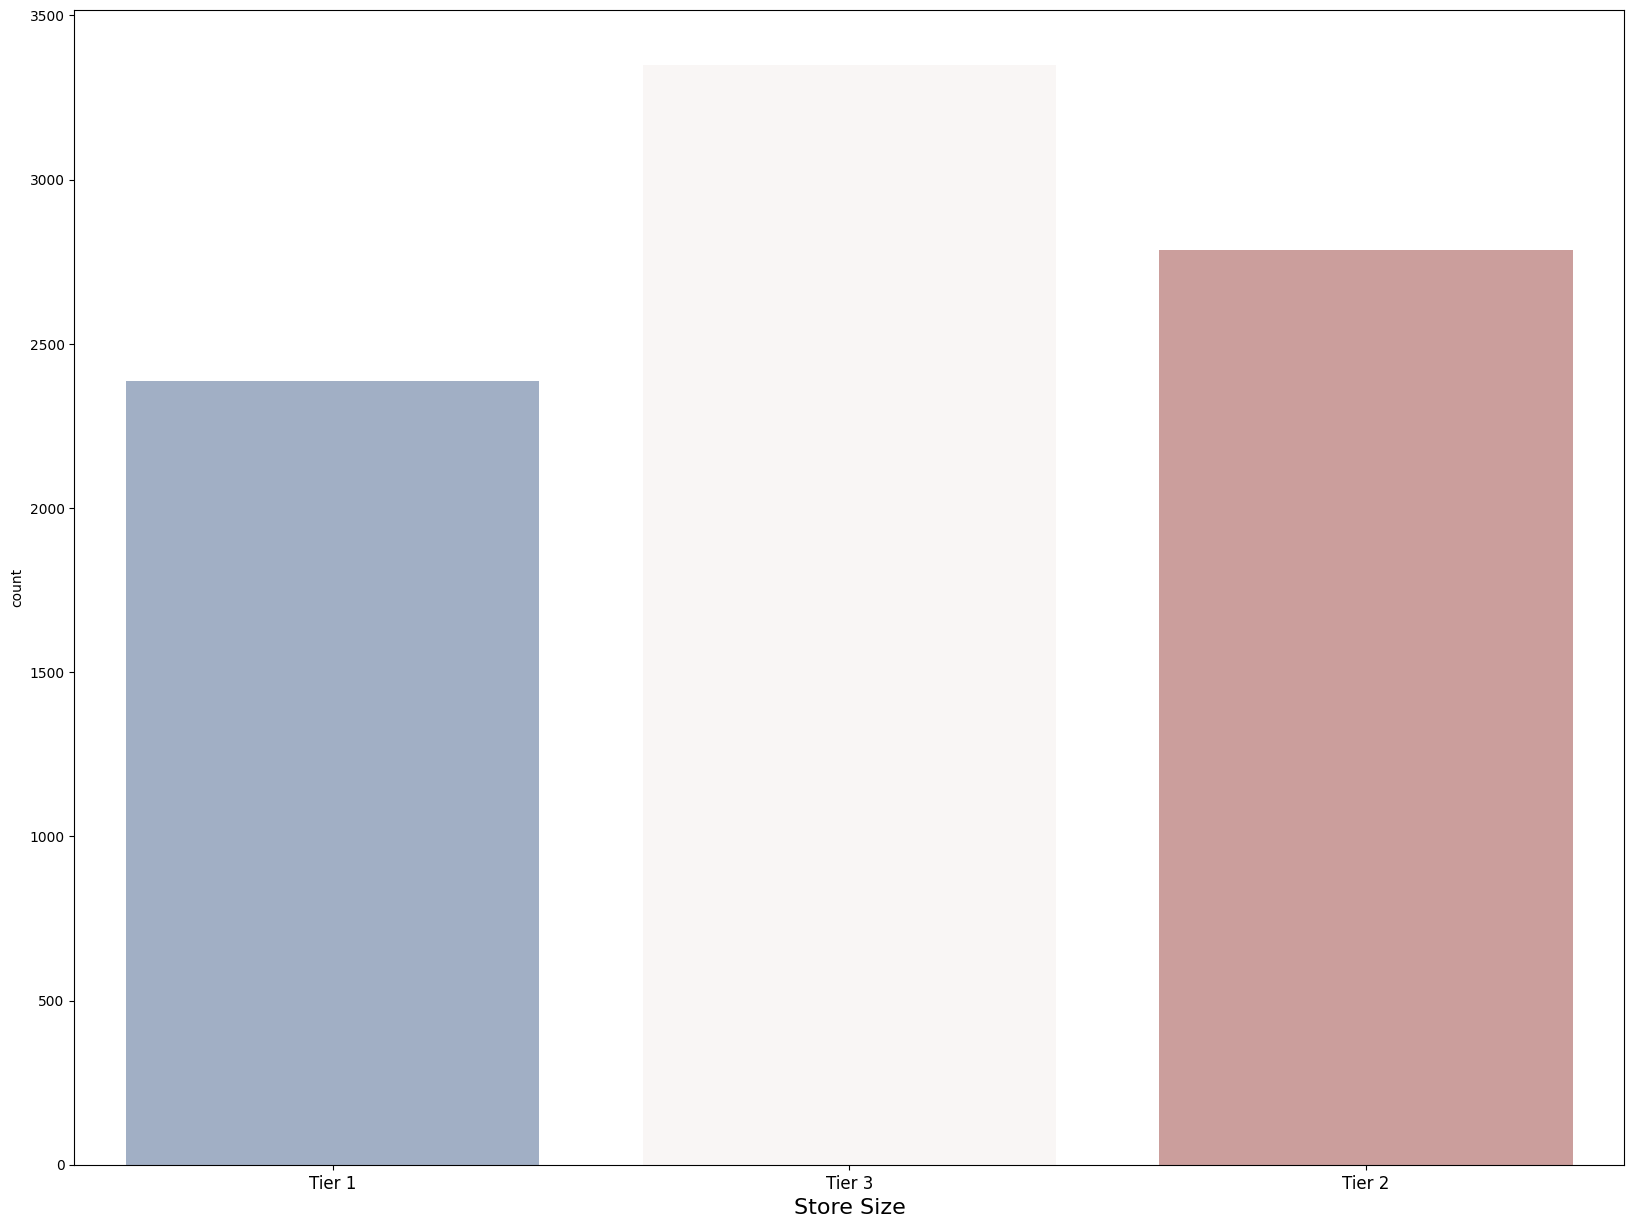

In [34]:
plt.figure(figsize=(20, 15))
sns.countplot(x= 'Outlet_Location_Type', data= trdf, palette= "vlag")
#sns.color_palette("flare")
plt.xticks(fontsize= 12)
plt.xlabel('Store Size', fontsize= 16)
plt.show()

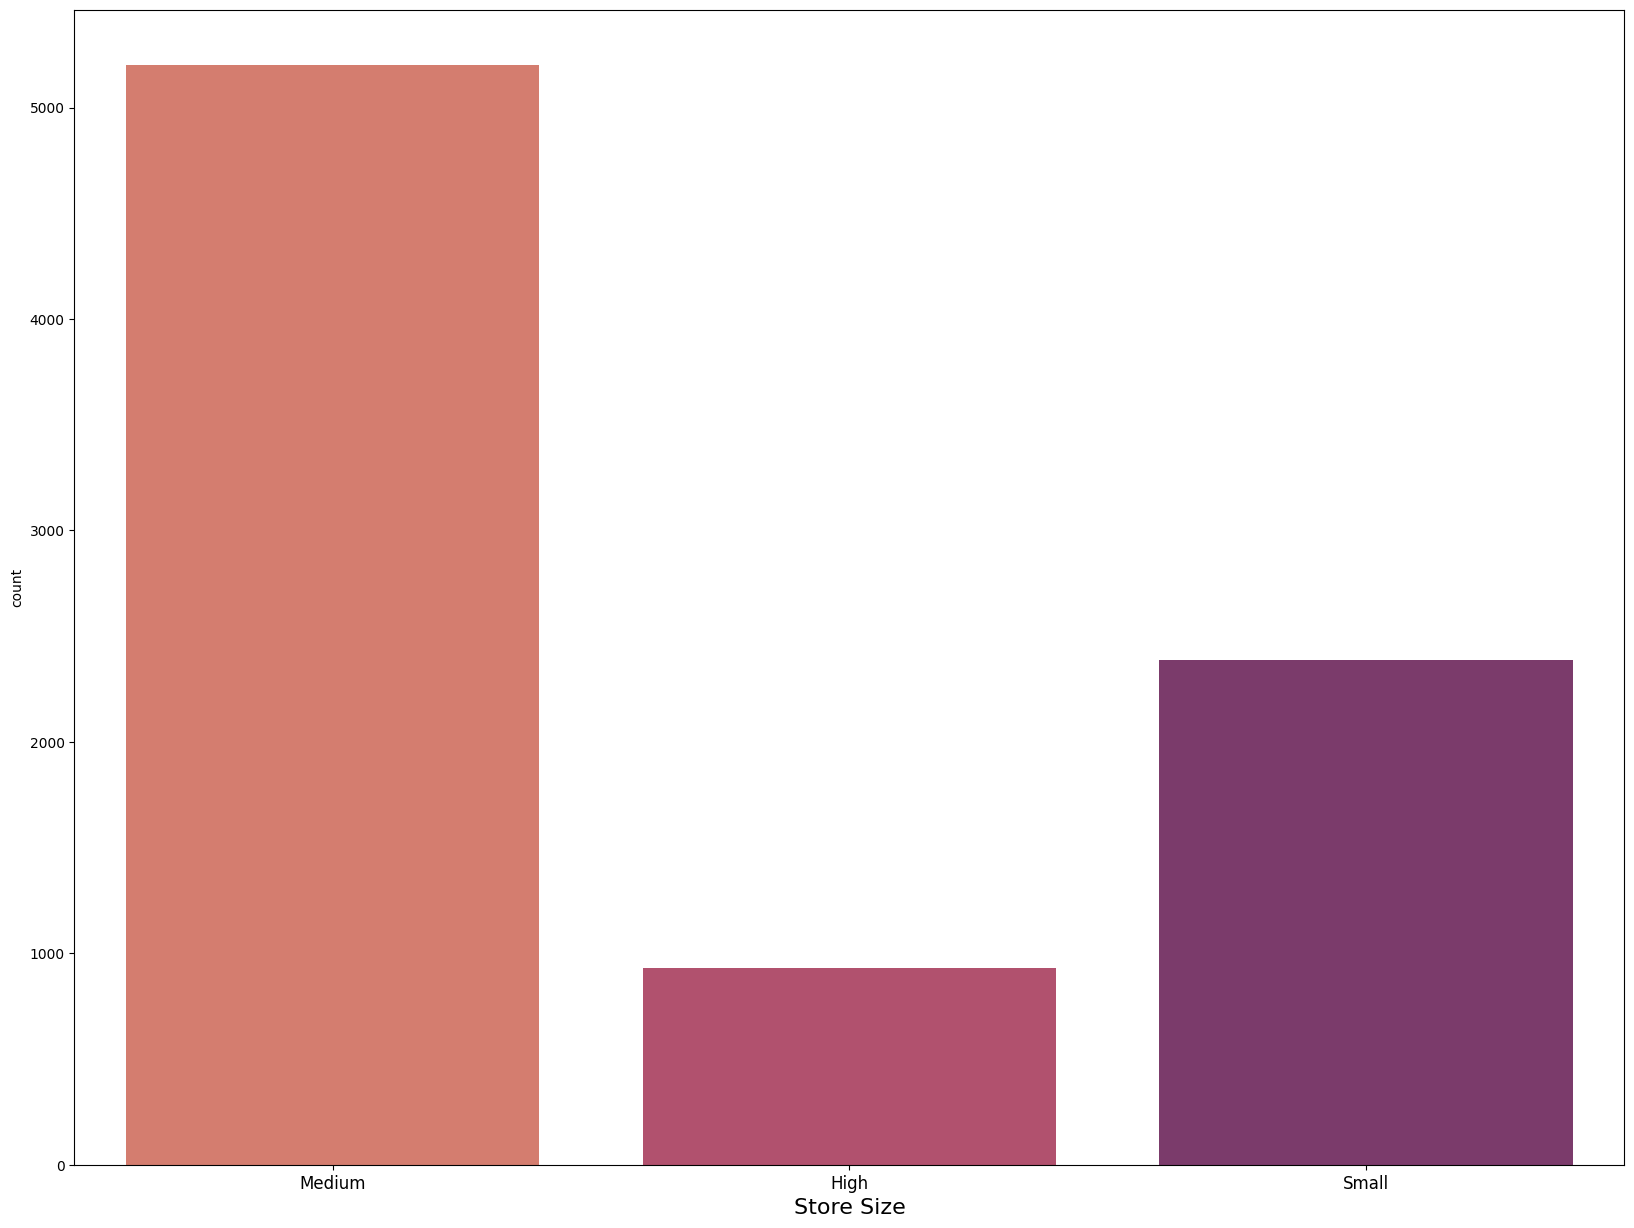

In [35]:
plt.figure(figsize=(20, 15))
sns.countplot(x= 'Outlet_Size', data= trdf, palette= "flare")
#sns.color_palette("flare")
plt.xticks(fontsize= 12)
plt.xlabel('Store Size', fontsize= 16)
plt.show()

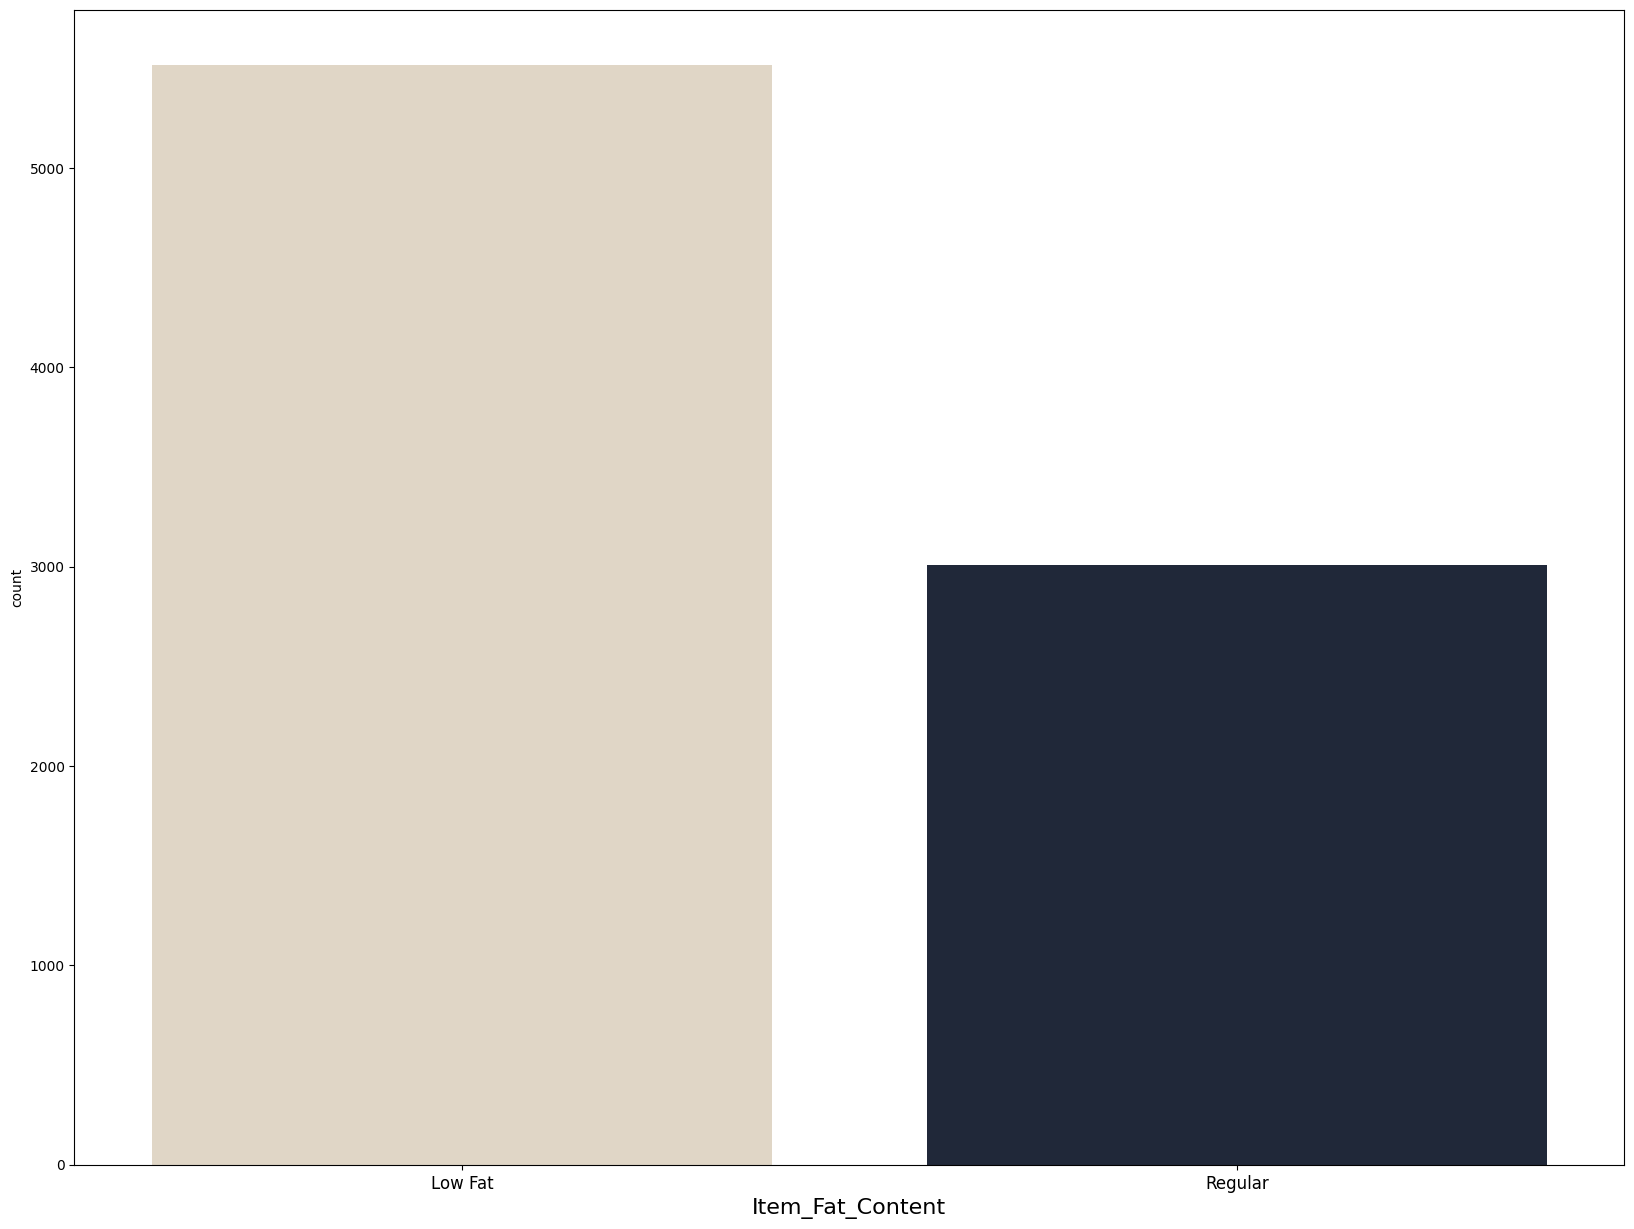

In [36]:
plt.figure(figsize=(20, 15))
sns.countplot(x= 'Item_Fat_Content', data= trdf, palette= "ch:s=-.5,r=.7")
#sns.color_palette("flare")
plt.xticks(fontsize= 12)
plt.xlabel('Item_Fat_Content', fontsize= 16)
plt.show()

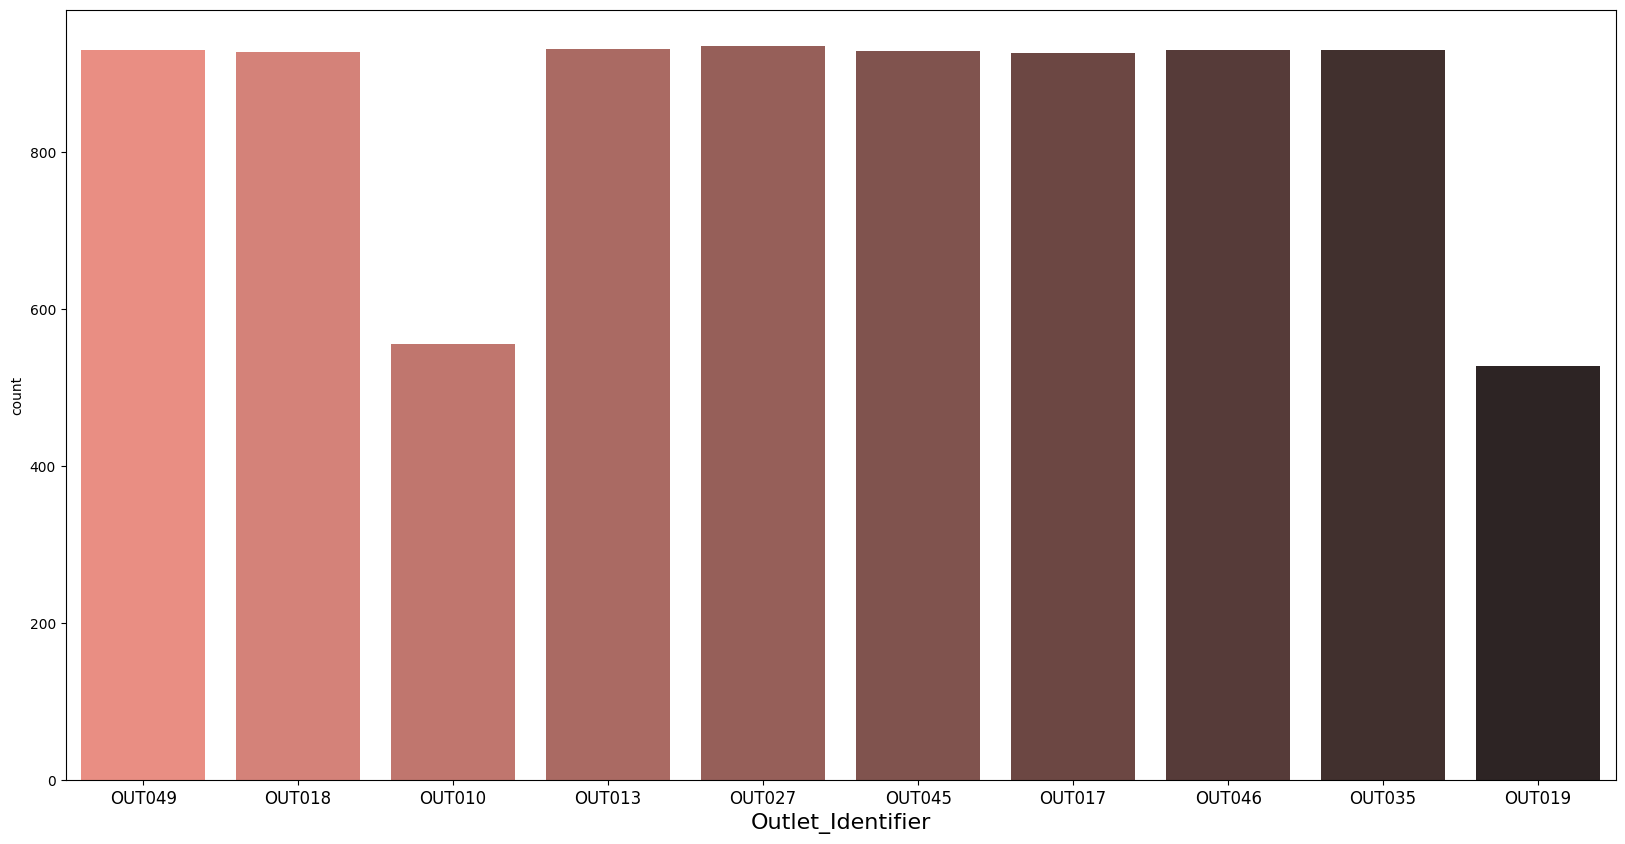

In [37]:
plt.figure(figsize=(20, 10))
sns.countplot(x= 'Outlet_Identifier', data= trdf, palette= "dark:salmon_r")
#sns.color_palette("flare")
plt.xticks(fontsize= 12)
plt.xlabel('Outlet_Identifier', fontsize= 16)
plt.show()

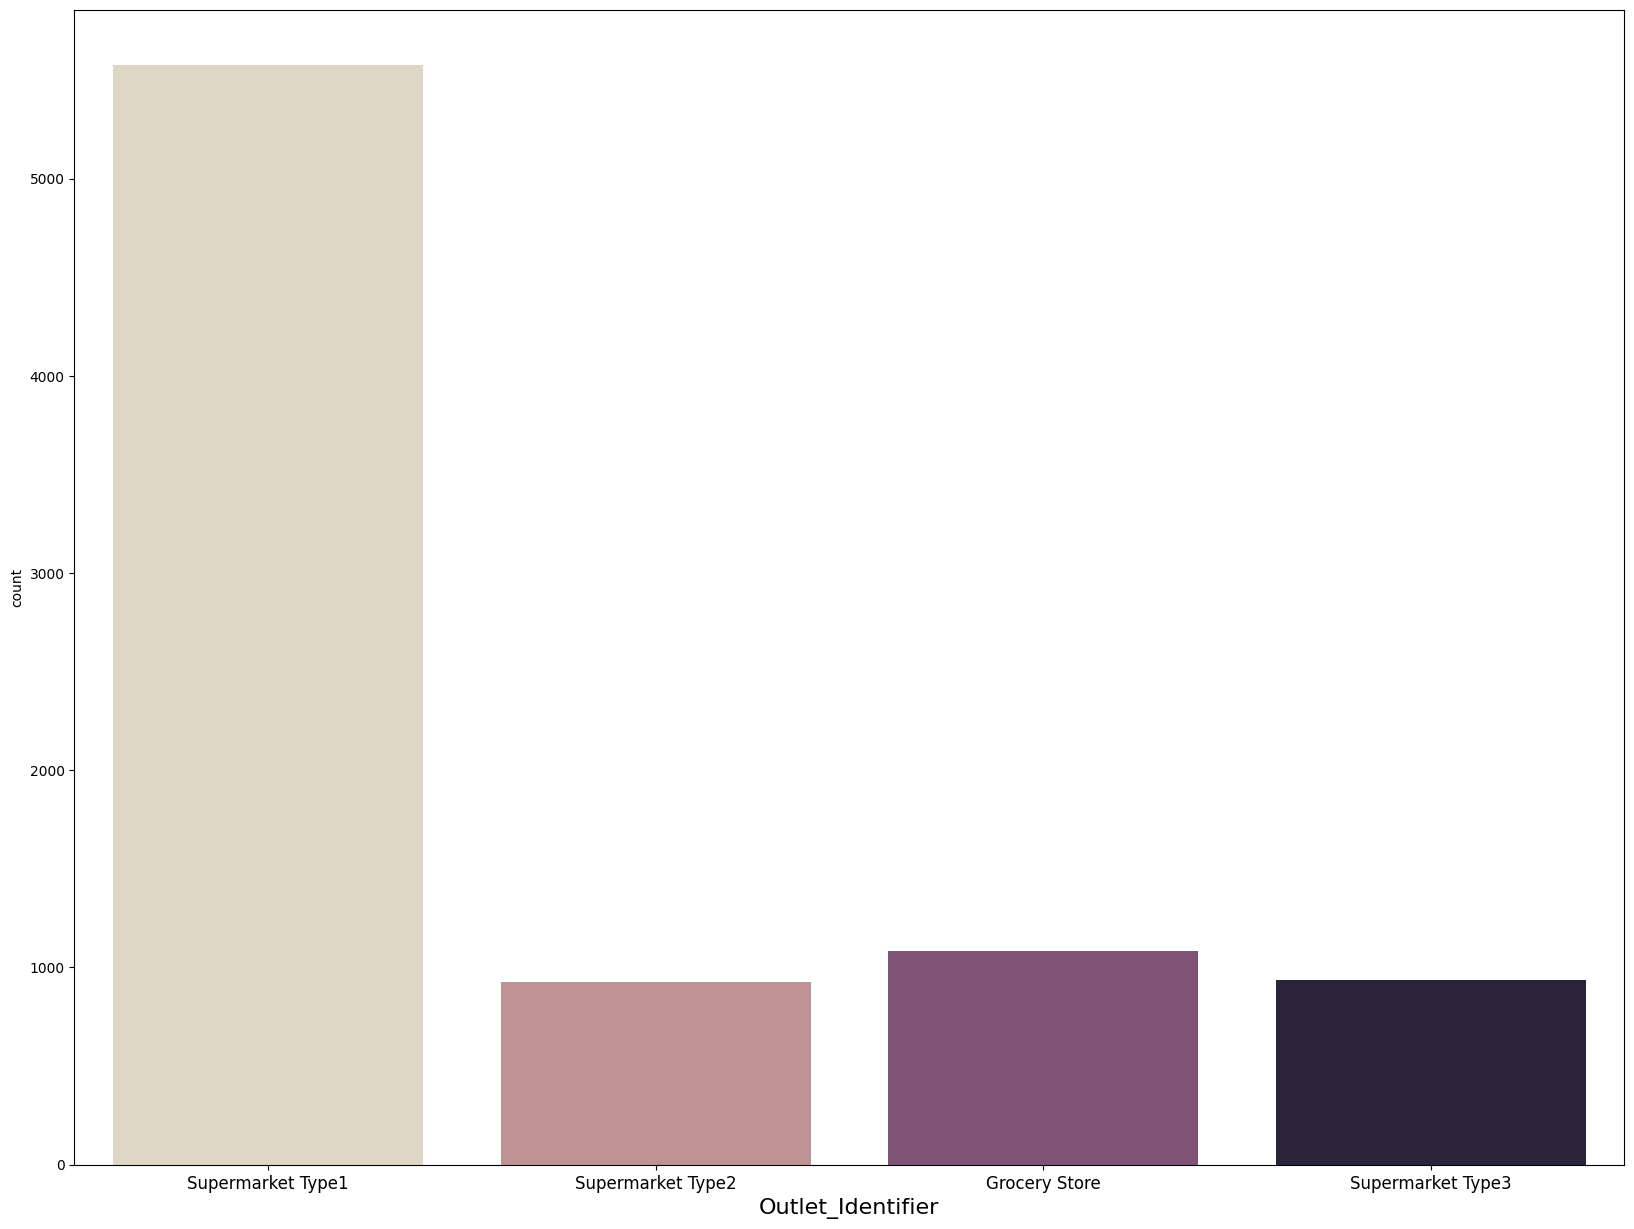

In [38]:
plt.figure(figsize=(20, 15))
sns.countplot(x= 'Outlet_Type', data= trdf, palette= "ch:s=-.2,r=.6")
#sns.color_palette("flare")
plt.xticks(fontsize= 12)
plt.xlabel('Outlet_Identifier', fontsize= 16)
plt.show()

# **Bivariate Analysis**

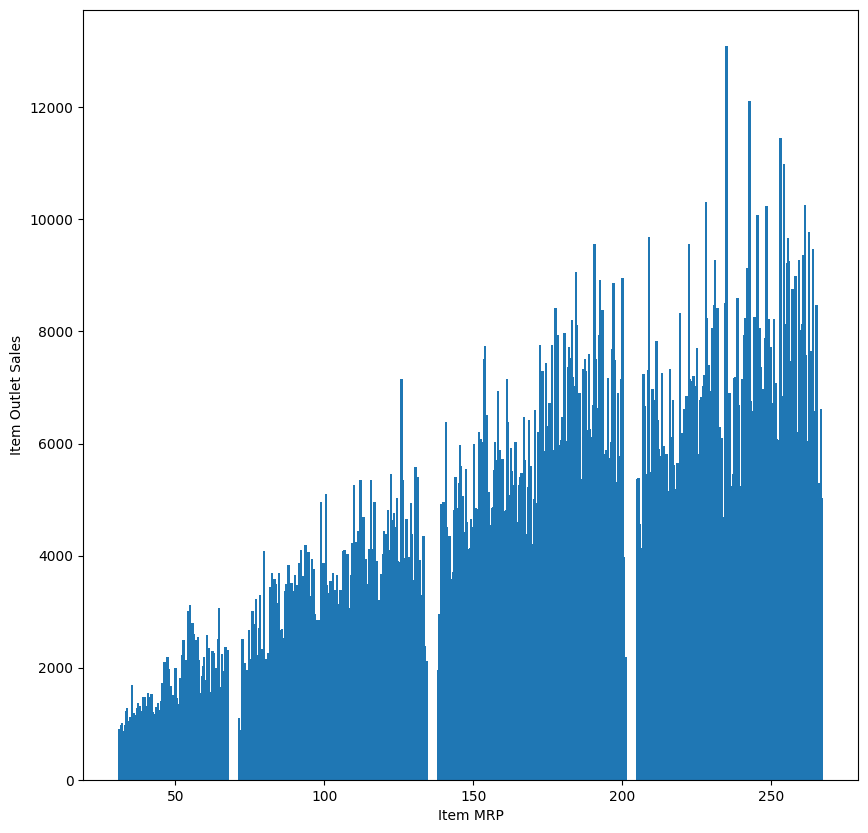

In [39]:
plt.figure(figsize=(10, 10))
plt.bar(trdf['Item_MRP'], trdf['Item_Outlet_Sales'])
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.show()

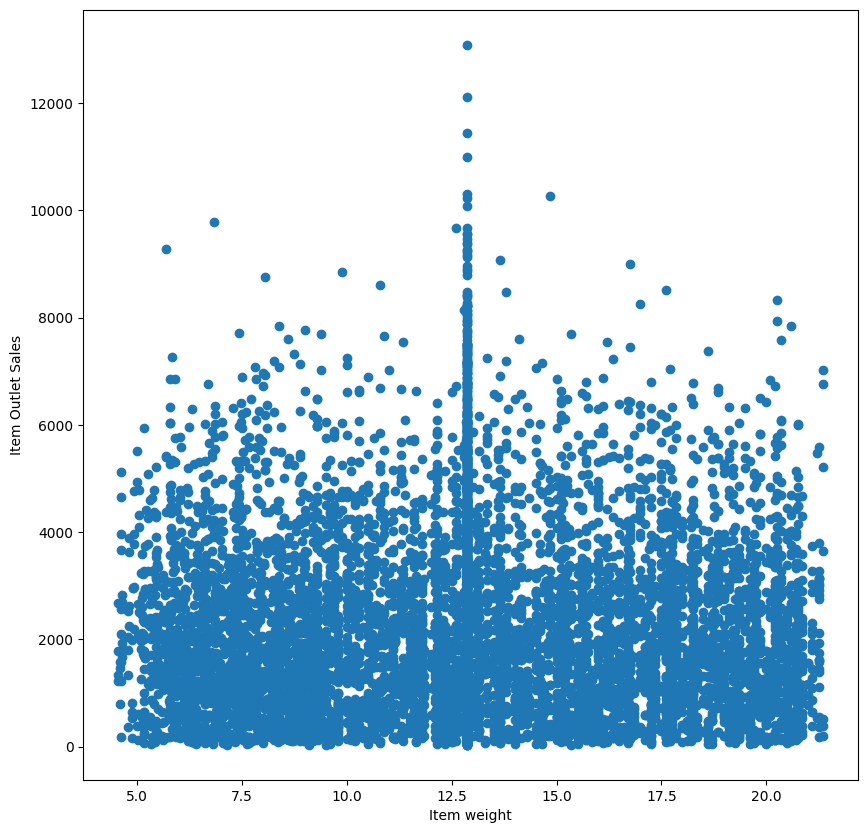

In [40]:
plt.figure(figsize=(10, 10))
plt.scatter(trdf['Item_Weight'], trdf['Item_Outlet_Sales'])
plt.xlabel('Item weight')
plt.ylabel('Item Outlet Sales')
plt.show()

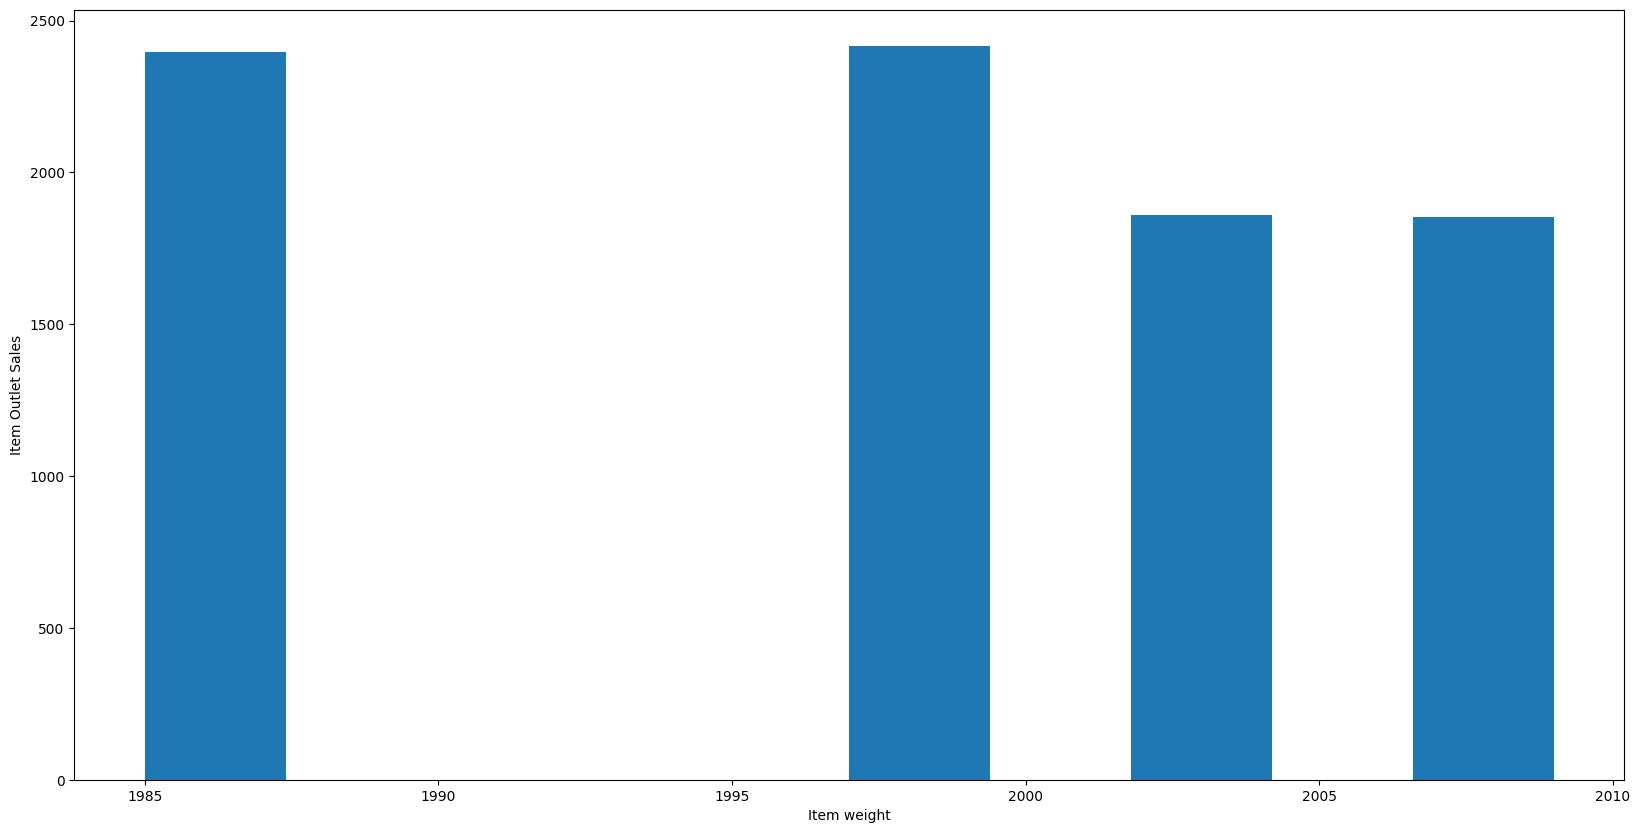

In [41]:
plt.figure(figsize=(20, 10))
plt.hist(trdf['Outlet_Establishment_Year'])
plt.xlabel('Item weight')
plt.ylabel('Item Outlet Sales')
plt.show()

In [42]:
trdf['Outlet_Age'],tsdf['Outlet_Age']= trdf['Outlet_Establishment_Year'].apply(lambda year: 2023 - year), tsdf['Outlet_Establishment_Year'].apply(lambda year: 2023 - year)

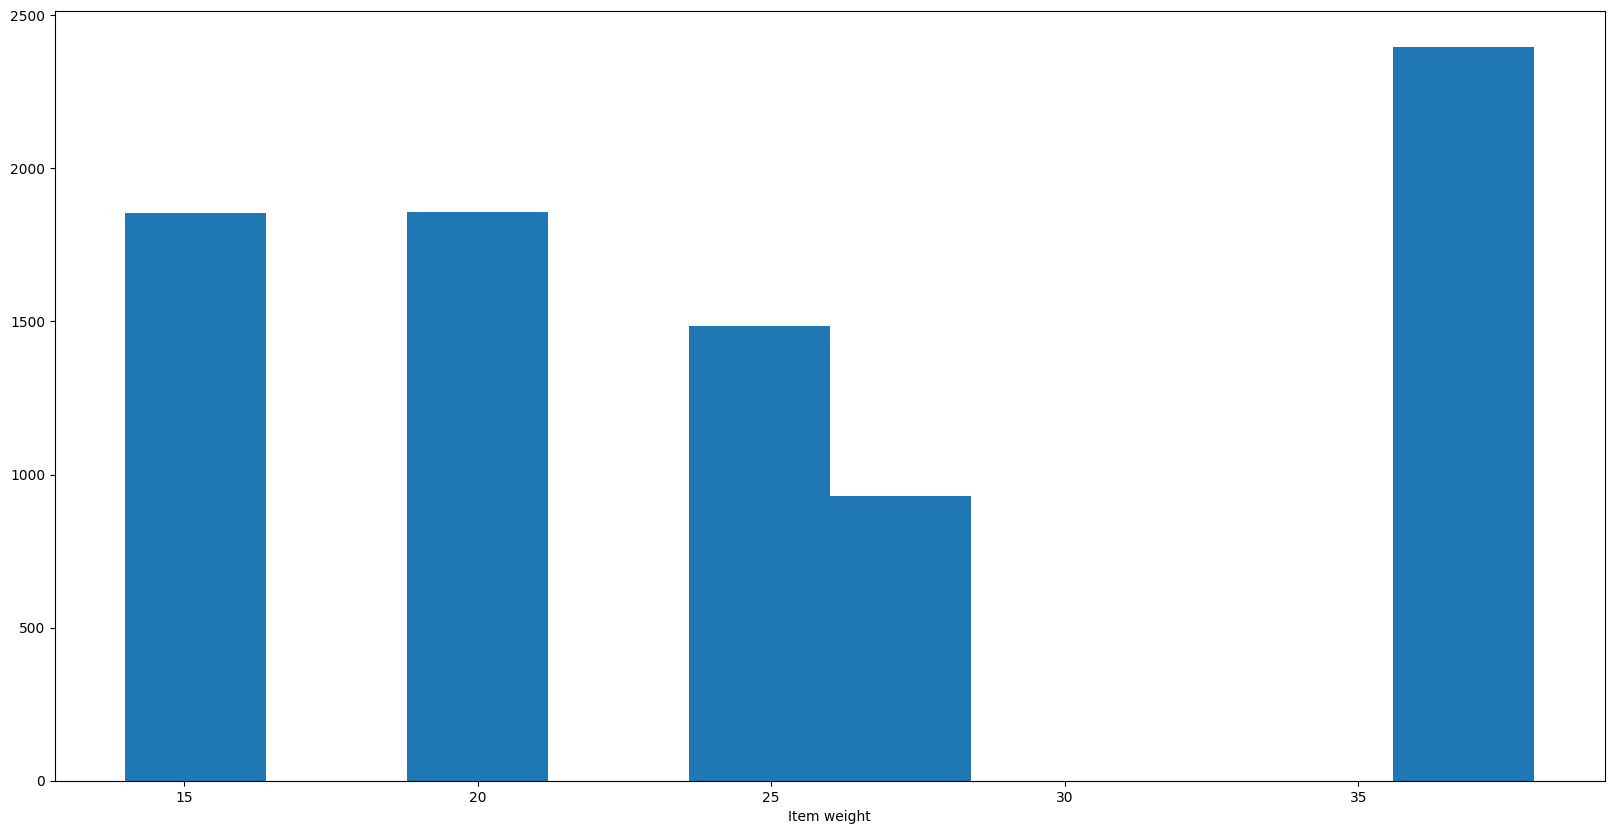

In [43]:
plt.figure(figsize=(20, 10))
plt.hist(trdf['Outlet_Age'])
plt.xlabel('Item weight')
plt.show()

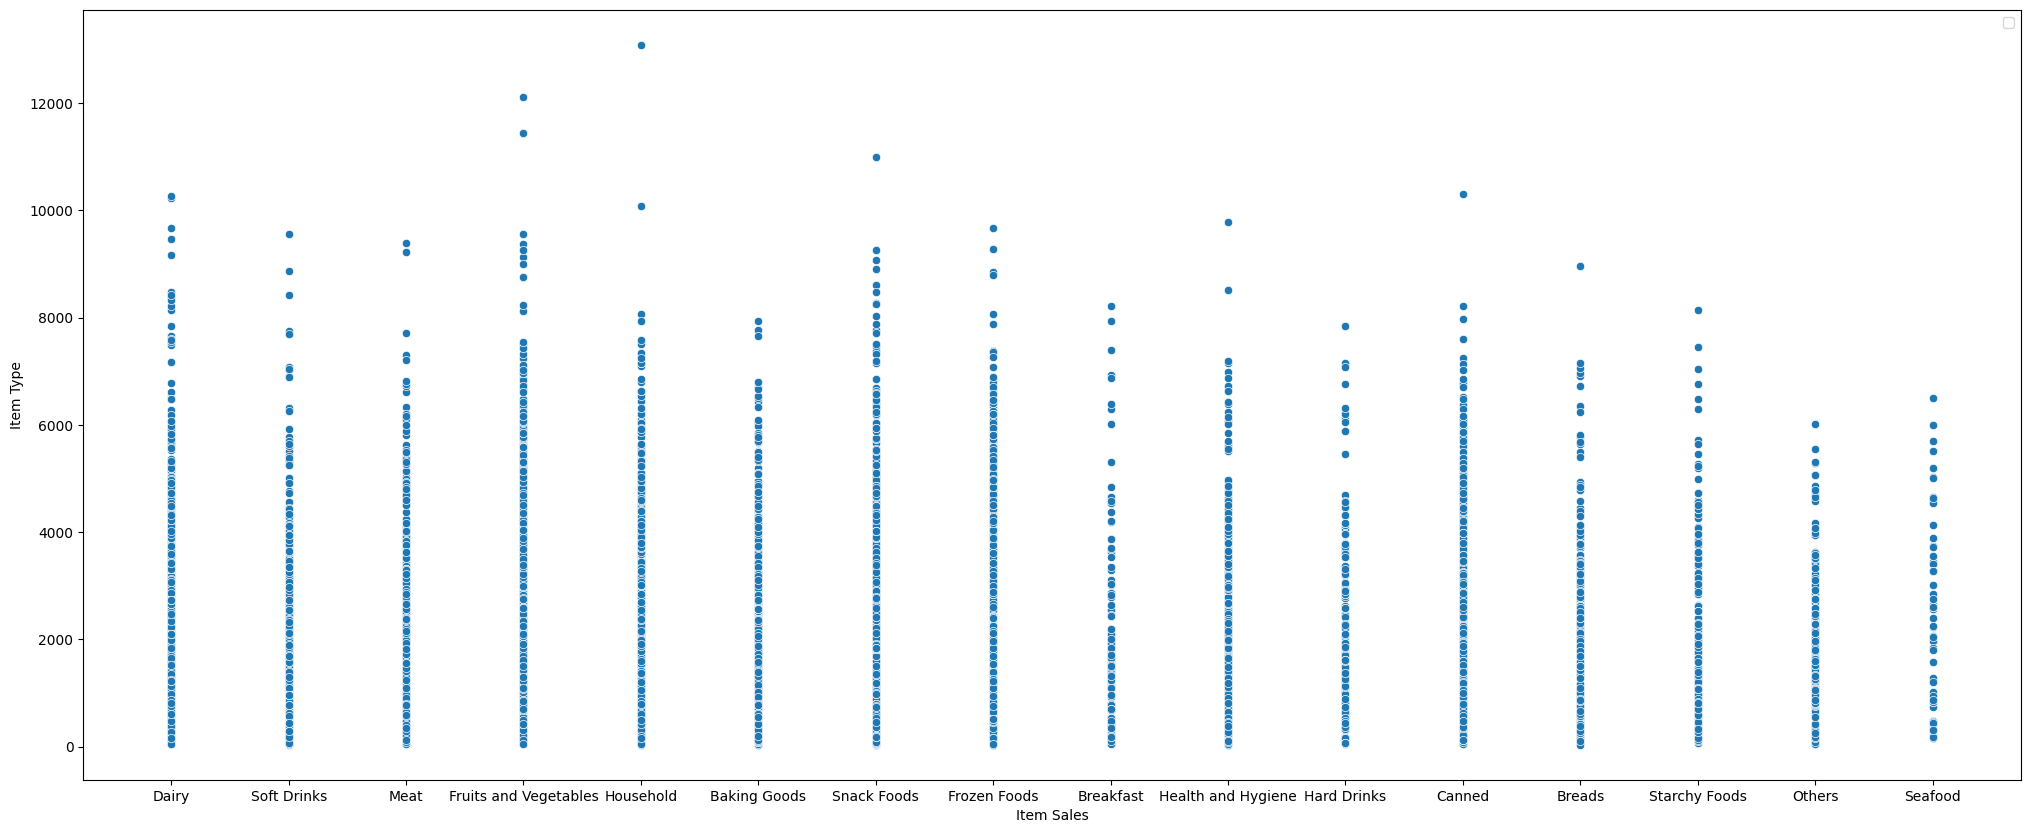

In [44]:
plt.figure(figsize=(25, 10))
sns.scatterplot(data=trdf, x='Item_Type', y='Item_Outlet_Sales')
plt.xlabel('Item Sales')
plt.ylabel('Item Type')
plt.legend()
plt.show()

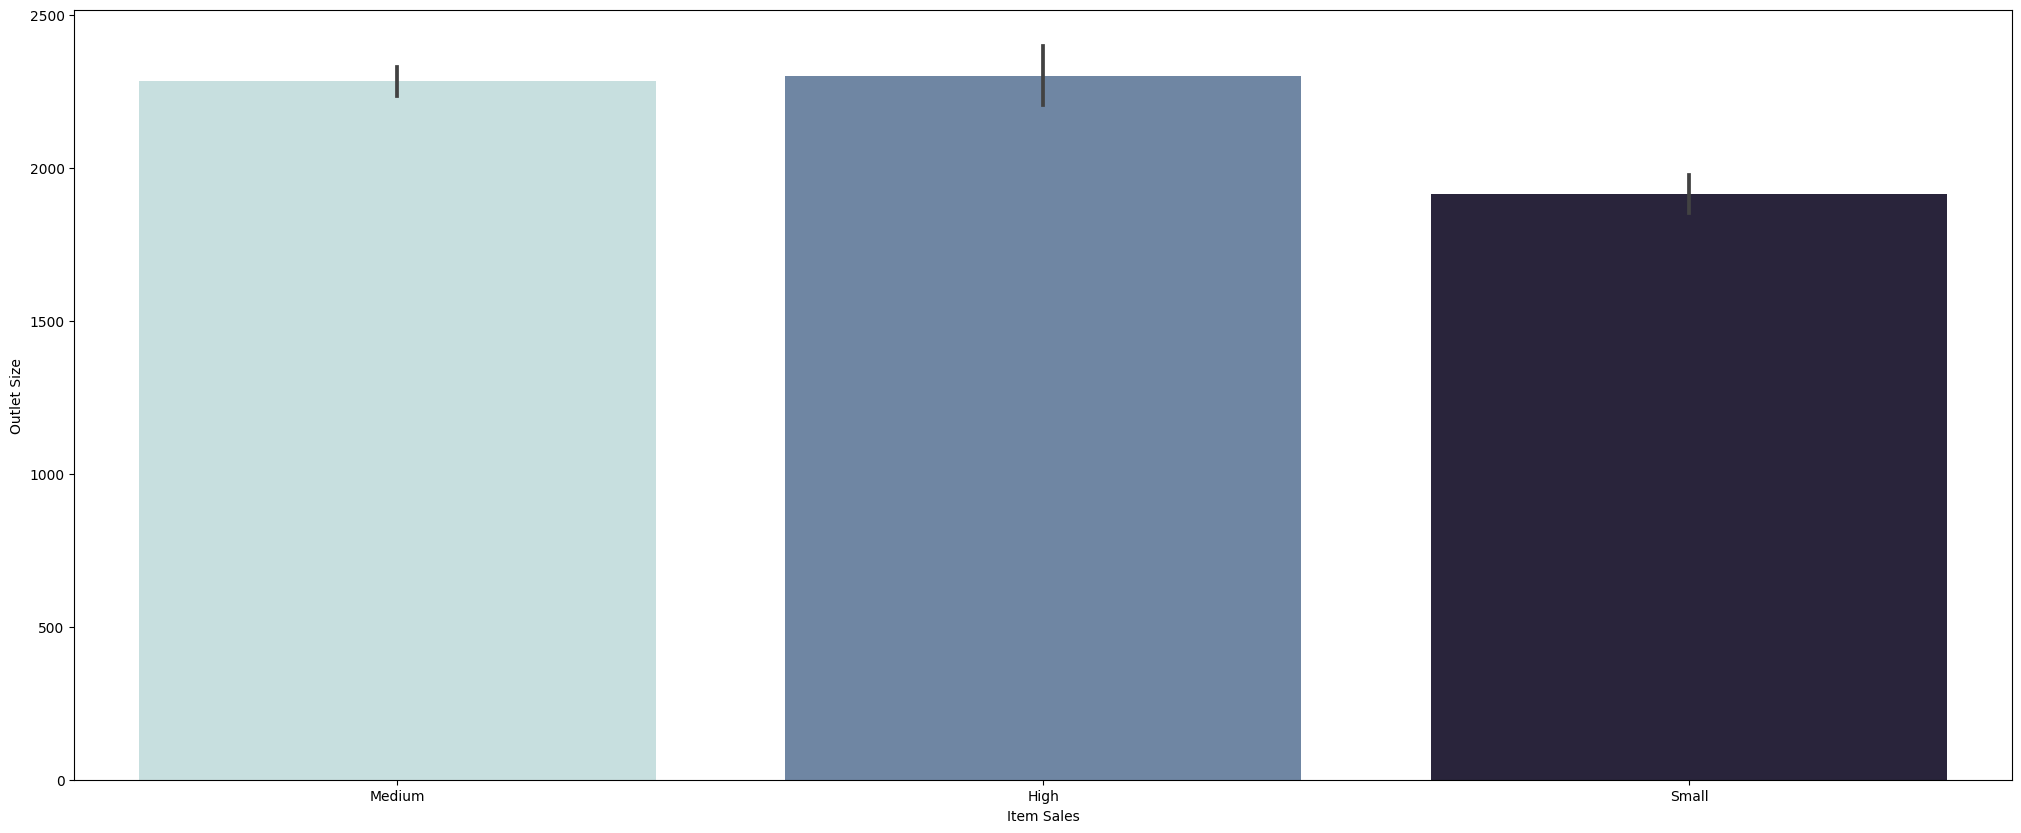

In [45]:
plt.figure(figsize=(25, 10))
sns.barplot(data=trdf, x='Outlet_Size', y='Item_Outlet_Sales', palette= 'ch:start=.2,rot=-.3')
plt.xlabel('Item Sales')
plt.ylabel('Outlet Size')
plt.show()

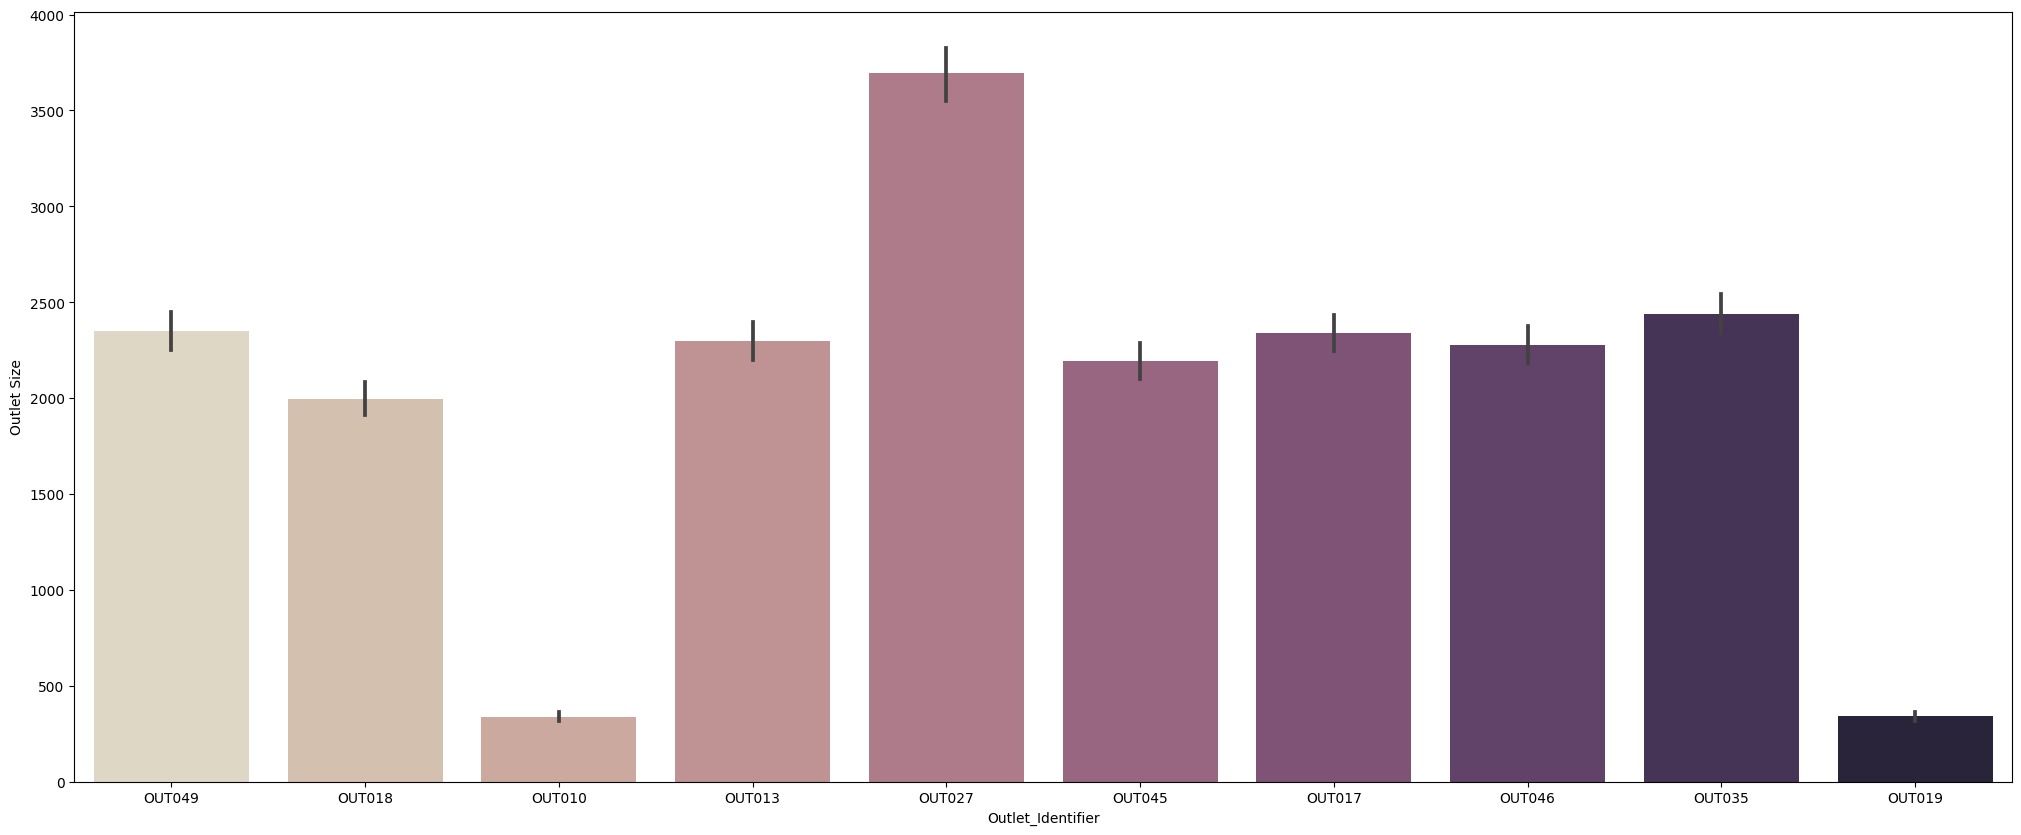

In [94]:
plt.figure(figsize=(25, 10))
sns.barplot(data=trdf, x='Outlet_Identifier', y='Item_Outlet_Sales', palette= 'ch:s=-.2,r=.6')
plt.xlabel('Outlet_Identifier')
plt.ylabel('Outlet Size')
plt.show()

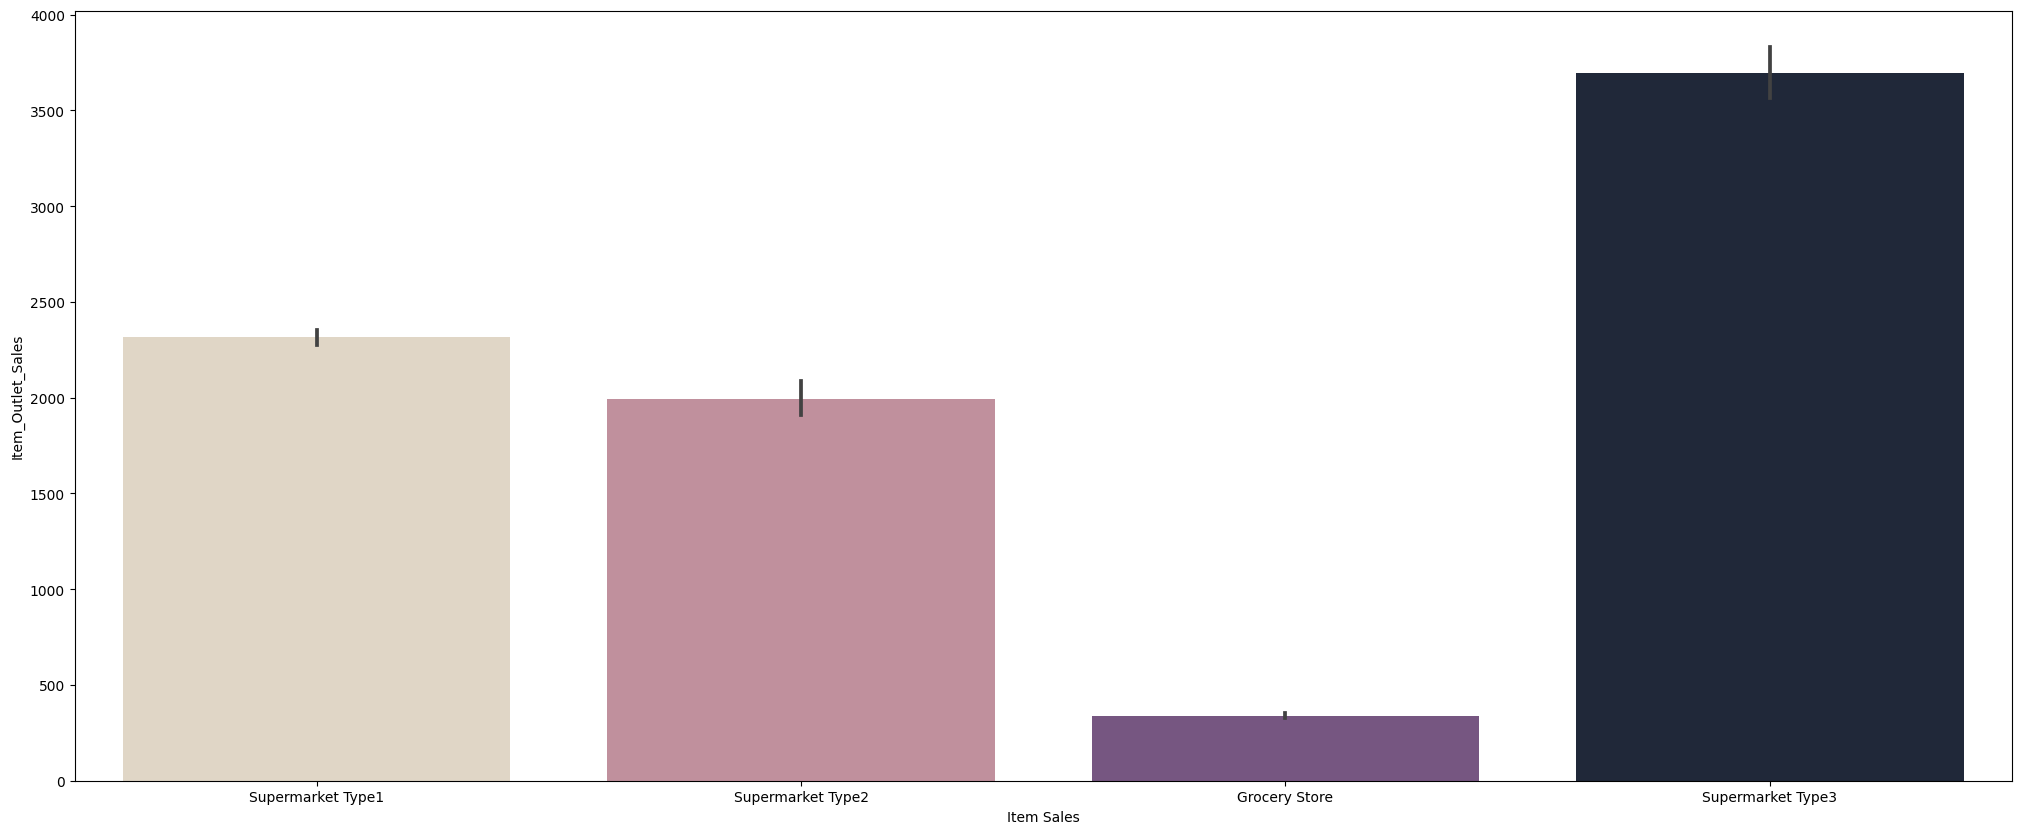

In [92]:
plt.figure(figsize=(25, 10))
sns.barplot(data=trdf, x='Outlet_Type', y='Item_Outlet_Sales', palette= "ch:s=-.5,r=.7")
plt.xlabel('Item Sales')
plt.ylabel('Item_Outlet_Sales')
plt.show()

<ipython-input-47-f380162e5e2a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(trdf.corr(), cmap= "BuPu")


<Axes: >

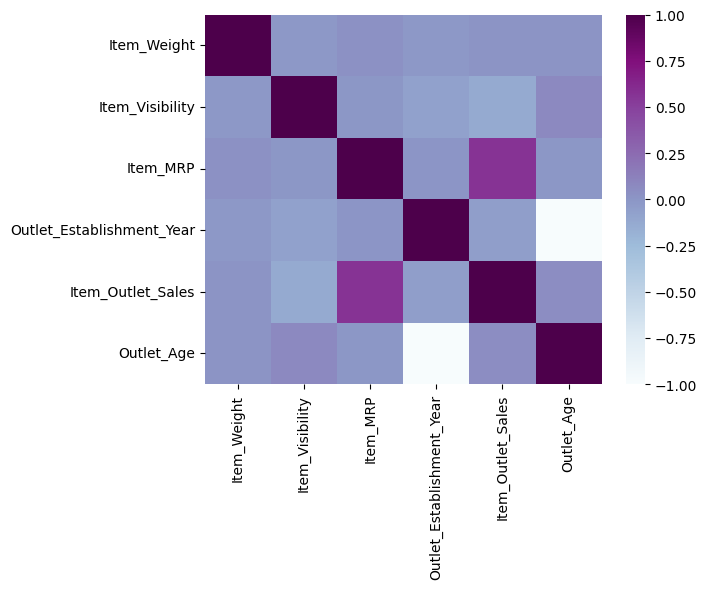

In [47]:
sns.heatmap(trdf.corr(), cmap= "BuPu")

In [48]:
Encoder= LabelEncoder()
label = ['Outlet_Size', 'Outlet_Location_Type', 'Item_Fat_Content']

In [49]:
trdf[label]= trdf[label].apply(Encoder.fit_transform)

In [50]:
trdf

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,24
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,14
2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,24
3,FDX07,19.200,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,25
4,NCD19,8.930,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,Snack Foods,214.5218,OUT013,1987,0,2,Supermarket Type1,2778.3834,36
8519,FDS36,8.380,1,0.046982,Baking Goods,108.1570,OUT045,2002,1,1,Supermarket Type1,549.2850,21
8520,NCJ29,10.600,0,0.035186,Health and Hygiene,85.1224,OUT035,2004,2,1,Supermarket Type1,1193.1136,19
8521,FDN46,7.210,1,0.145221,Snack Foods,103.1332,OUT018,2009,1,2,Supermarket Type2,1845.5976,14


In [51]:
tsdf[label]= tsdf[label].apply(Encoder.fit_transform)

In [52]:
tsdf

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,FDW58,20.750000,0,0.007565,Snack Foods,107.8622,OUT049,1999,1,0,Supermarket Type1,24
1,FDW14,8.300000,1,0.038428,Dairy,87.3198,OUT017,2007,1,1,Supermarket Type1,16
2,NCN55,14.600000,0,0.099575,Others,241.7538,OUT010,1998,1,2,Grocery Store,25
3,FDQ58,7.315000,0,0.015388,Snack Foods,155.0340,OUT017,2007,1,1,Supermarket Type1,16
4,FDY38,12.695633,1,0.118599,Dairy,234.2300,OUT027,1985,1,2,Supermarket Type3,38
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,1,0.013496,Snack Foods,141.3154,OUT046,1997,2,0,Supermarket Type1,26
5677,FDD47,7.600000,1,0.142991,Starchy Foods,169.1448,OUT018,2009,1,2,Supermarket Type2,14
5678,NCO17,10.000000,0,0.073529,Health and Hygiene,118.7440,OUT045,2002,1,1,Supermarket Type1,21
5679,FDJ26,15.300000,1,0.000000,Canned,214.6218,OUT017,2007,1,1,Supermarket Type1,16


In [53]:
lst = ['Item_Type', 'Outlet_Type']

In [54]:
lst = ['Item_Type', 'Outlet_Type']


In [55]:
hot= OneHotEncoder(sparse= False)
tronehot= pd.DataFrame(hot.fit_transform(trdf[lst])).astype('int64')
tsonehot= pd.DataFrame(hot.fit_transform(tsdf[lst])).astype('int64')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [56]:
tronehot.columns = hot.get_feature_names_out(lst)
tsonehot.columns = hot.get_feature_names_out(lst)

In [57]:
tronehot.index= trdf.index
tsonehot.index= tsdf.index

In [58]:
tr= pd.concat([trdf, tronehot], axis= 1)
ts= pd.concat([tsdf, tsonehot], axis= 1)

In [59]:
tr= tr.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Type', 'Item_Type'], axis=1)

In [60]:
ts= ts.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Type', 'Item_Type'], axis=1)

In [61]:
tr.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,24,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,14,0,0,...,0,0,0,0,1,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,24,0,0,...,1,0,0,0,0,0,0,1,0,0
3,19.20,1,0.000000,182.0950,1,2,732.3800,25,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0,0.000000,53.8614,0,2,994.7052,36,0,0,...,0,0,0,0,0,0,0,1,0,0


In [62]:
X= tr.drop('Item_Outlet_Sales', axis=1)
y= tr['Item_Outlet_Sales']

In [63]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.8, random_state= 0)

# **Linear Regression**

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [66]:
slope= model.coef_[0]
intercept= model.intercept_

In [67]:
y_pred = model.predict(X_test)

In [68]:
mse = MSE(y_test, y_pred)

In [69]:
print("Slope: ", slope)
print("Intercept: ", intercept)
print("Predictions: ", y_pred)
mse

Slope:  0.3978530993566754
Intercept:  151.2226173992617
Predictions:  [2680.27093973 2521.51187925 2260.18788534 ... 1730.89957448 1421.53044267
  676.92212741]


1285793.5422420811

# **Regularized Linear Regression**

In [70]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [71]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
ridge= Ridge(alpha= 1)
ridge.fit(X_train, y_train)

Ridge(alpha=1)

In [73]:
y_pred= ridge.predict(X_test)

In [74]:
score = ridge.score(X_test, y_test)

In [75]:
mse = MSE(y_test, y_pred)

In [76]:
print("score: ", score)
print("Predictions: ", y_pred)
mse

score:  0.559275793339143
Predictions:  [2679.8514167  2521.41071614 2259.99155921 ... 1731.16639514 1422.00813502
  677.63069546]


1285805.8428962014

# **Random Forest**

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [78]:
X, y = make_classification(n_samples=1000, n_features=4, random_state=0)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [80]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)

In [81]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [82]:
y_pred1 = rf_classifier.predict(X_test)

In [83]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred1))

Accuracy: 0.9766666666666667


In [84]:
mse = MSE(y_test, y_pred1)
mse

0.023333333333333334

In [85]:
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [86]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=2, random_state=123)

In [87]:
clf = xgb.XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, subsample=0.8, colsample_bynode=0.6, random_state=123)
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=0.6,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)

In [88]:
y_pred = clf.predict(X_test)
accuracy = sum(y_pred == y_test) / len(y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.33%


In [89]:
mse = MSE(y_test, y_pred)

In [90]:
print("MSE:", mse)

MSE: 0.02666666666666667


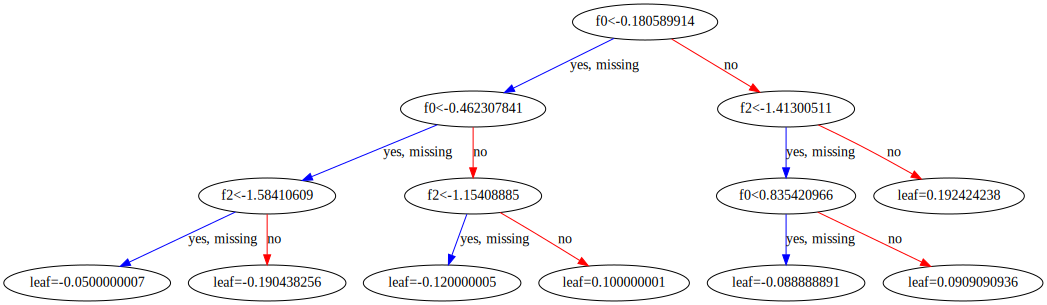

In [91]:
import graphviz
xgb.to_graphviz(clf, num_trees=0)

# **Summary**

Fruits and vegetables, snack foods are the best-selling products.

Most of the stores are medium in size.

Most of the items are low fat.

Store[OUT019] and store[OUT010] is low compared to the rest.

Most of the stores are supermarket Type1.

Most of the store was established more than 35 years ago.

Althouth most of the sotres are type 1, the highest in sales is supermarket type3.

Store OUT027 is the highest stores in sales.